In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical


In [13]:
def load_images_from_folder(folder, label, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = load_img(img_path, target_size=image_size)
            img = img_to_array(img)
            images.append(img)
            labels.append(label)
    return images, labels

In [14]:
def preprocess_data(folders, image_size=(64, 64)):
    images = []
    labels = []
    for label, folder in enumerate(folders):
        imgs, lbls = load_images_from_folder(folder, label, image_size)
        images.extend(imgs)
        labels.extend(lbls)
    images = np.array(images)
    labels = np.array(labels)
    images = images.astype('float32') / 255.0
    labels = to_categorical(labels, 2)
    return train_test_split(images, labels, test_size=0.1, random_state=42)

In [29]:
# Specify the folders for each class
homer_folder = 'Homer'
bart_folder = 'Bart'

# Preprocess the data
folders = [homer_folder, bart_folder]
X_train, X_test, y_train, y_test = preprocess_data(folders)

In [30]:
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Change to 2 units with softmax
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Use categorical_crossentropy

In [31]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
8/8 [==============================] - 1s 23ms/step - loss: 3.2606 - accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 0s 23ms/step - loss: 1.1339 - accuracy: 0.5496
Epoch 3/10
8/8 [==============================] - 0s 25ms/step - loss: 0.7611 - accuracy: 0.5992
Epoch 4/10
8/8 [==============================] - 0s 21ms/step - loss: 0.5820 - accuracy: 0.7149
Epoch 5/10
8/8 [==============================] - 0s 22ms/step - loss: 0.5875 - accuracy: 0.7355
Epoch 6/10
8/8 [==============================] - 0s 22ms/step - loss: 0.4993 - accuracy: 0.7438
Epoch 7/10
8/8 [==============================] - 0s 22ms/step - loss: 0.5683 - accuracy: 0.6983
Epoch 8/10
8/8 [==============================] - 0s 23ms/step - loss: 0.5111 - accuracy: 0.7769
Epoch 9/10
8/8 [==============================] - 0s 26ms/step - loss: 0.4619 - accuracy: 0.7851
Epoch 10/10
8/8 [==============================] - 0s 22ms/step - loss: 0.3267 - accuracy: 0.8512


In [32]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


1/1 [==============================] - 0s 164ms/step - loss: 0.7023 - accuracy: 0.7407
Test Accuracy: 0.7407


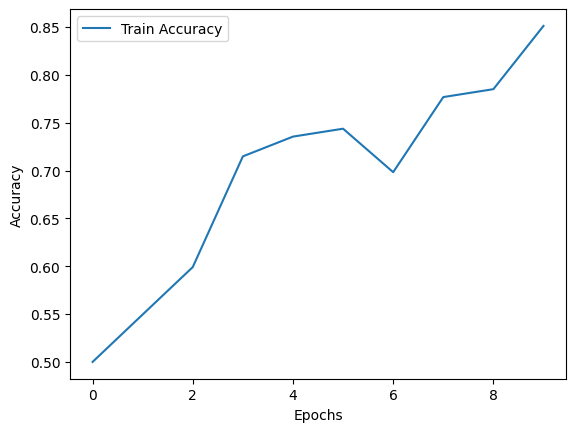

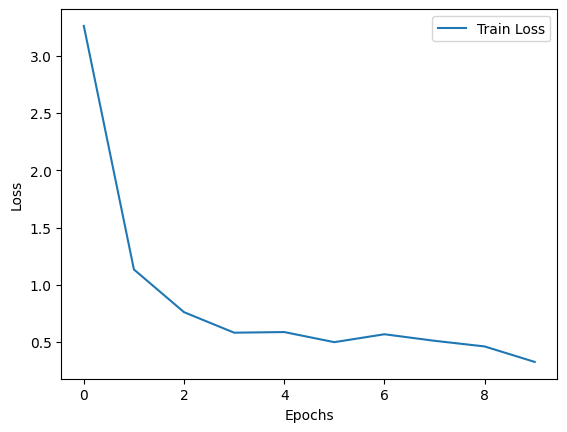

In [33]:
# Plot the training accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()